In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.special as sp

In [2]:
%matplotlib inline

In [3]:
a  = np.zeros([3,2])
a

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [5]:
a[0,0] = 1
a[0,1] = 2
a[1,0] = 9
a[2,1] = 12
a

array([[ 1.,  2.],
       [ 9.,  0.],
       [ 0., 12.]])

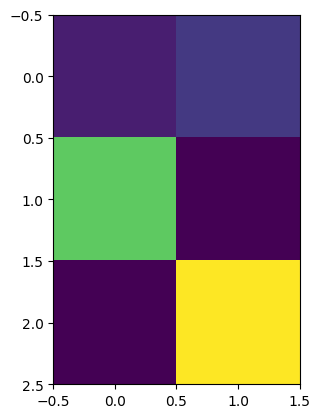

In [6]:
# Если не добавлять в конце ; будет выводится <matplotlib.image.AxesImage at 0x20b4c28b950> перед графиком
plt.imshow(a, interpolation="nearest");

<img src="png\Example.png">  

In [7]:
# Определение класса нейронной сети. C ф-циями инициализации, терировки, опросом(после работы трех слоев)
class neuralNetwork:

    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.innodes = inputnodes   # количество узлов входного слоя
        self.hnodes = hiddennodes   # количество узлов скрытого слоя 
        self.onodes = outputnodes   # количество узлов выходного слоя 
        
        self.lr = learningrate  # коэффициент обучения
        self.activation_function = lambda x : sp.expit(x) # функция активации(сигмоида)

        # Матрица связей коэф-ов wih (входной -> скрытый) и 
        # Матрица связей коэф-ов who (скрытый -> выходной)
        # Весовые коэффициенты связей между узлом i и узлом j следующего слоя обозначим как w_i_j
        # i     j     k
        # w11   w21   w31
        # w12   w22   w32
        # w13   w23   w33
        # Ниже мы задали:
        # матрица W весовых коэф. размерностью [hnodes X innodes]
        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.innodes)) #центр норм-го распр-я установлен в нуле(0.0)
        # матрица W весовых коэф. размерностью [onodes X hnodes]
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))


    # Тренировка нейронной сети:
    # Уточнение весовых коэффициентов в процессе обработки предоставленных для обучения сети терн.примеров
    def train(self, inputs_list, targets_list):

        #targets = np.array(targets_list, ndmin=2).T
        # Сама непосредственно тренировка включает две фазы:
        # 1. Расчет выходного сигнала(ф-ция query)
        # 2. Обратное распространение ошибок, информурующее нас о том, каковы должны быть поправки к весам
        
        # Преобразовать список входных значений в двухмерный массив
        inputs = np.array(inputs_list, ndmin=2).T   # транспонируем т.к. на вход строка , а нужен столбец
        targets = np.array(targets_list, ndmin=2).T # ndim - кол-ство осей в массиве. Т.е. 2 - двухмерный массив

        #Код аналогичный в query --------------------------------
        # Расчитать входящие сигналы для скрытого слоя
        hidden_inputs = np.dot(self.wih, inputs)
        # Расчитать выходящие сигналы из скрытого слоя 
        hidden_outputs = self.activation_function(hidden_inputs) 

        # Расчитать входящие сигналы для выходного слоя
        final_inputs = np.dot(self.who, hidden_outputs)
        # Расчитать входящие сигналы для выходного слоя
        final_outputs = self.activation_function(final_inputs)
        #--------------------------------------------------------
        

        # Ошибка = целевое значение(target) - фактическое значение
        output_errors = targets - final_outputs

        # Ошибки скрытого слоя - это ошибки output_errors, распределенные прапорционально
        # весовым коэффициентам связей и рекомбинированные на скрытых узлах
        hidden_errors = np.dot(self.who.T, output_errors) 

        # Обновить весовые коэфф. для связей между скрытым и выходным слоями
        self.who += self.lr * np.dot(output_errors * final_outputs * (1.0 - final_outputs), np.transpose(hidden_outputs))

        # Обновить весовые коэфф. для связей между входным и скрытым слоями
        self.wih += self.lr * np.dot(hidden_errors * hidden_outputs * (1.0 - hidden_outputs), np.transpose(inputs))


    # Опрос нейронной сети:
    # Получение значений сигналов с выходных узлов после предоствления значений входящих сигналов
    # (т.е. в качестве аргумента входные данные НС, возвращает выходные данные НС)
    def query(self, inputs_list):
        # преобразовать список входных значений в двумерный массив
        # и выполнить транспонирование, для умножения матрицы W(к-ство строк) на матрицу I(к-ство столбцов)  
        inputs_list = np.array(inputs_list, ndmin=2).T

        # расчитать входящие сигналы в скрытый слой
        hidden_inputs = np.dot(self.wih, inputs_list)
        # расчитать исходящие сигналы из скрытого слоя
        hidden_outputs = self.activation_function(hidden_inputs)

        # расчитать входящие сигналы в выходной слой
        final_inputs = np.dot(self.who, hidden_outputs)
        # расчитать исходящие сигналы из выходного слоя
        final_outputs = self.activation_function(final_inputs)

        return final_outputs


In [8]:
np.random.normal(0.0, pow(3, -0.5), (3, 3))

array([[-0.96878125, -0.12474814, -0.22128386],
       [-0.09618644, -0.17583744,  0.67005726],
       [ 0.00236207, -0.2491605 ,  0.57257359]])

Расчет сигналов перед ф-цией активации на скрытый слой :     
${X_{скрытый}}$	= ${W_{входной\_скрытый}}$ * $I$, Размерность W матрицы к-ство скрытых узлов Х к-ство входных.               
Для получения выходных сигналов скрытого слоя:      
${O_{скрытый}}$	= ${СИГМОИДА(X_{скрытый})}$     
y(x) = 1 / (1 + e<sup>-x</sup>) - функция активации в нашем примере(сигмоида)


Матрица связей узлов скрытого и выходного слоев:        
${W_{output\_nodes\_hidden\_nodes}}$    
${X_{скрытый}}$	= ${W_{входной\_скрытый}}$ * $I$





In [24]:
input_nodes = 3
hidden_nodes = 3
output_nodes = 3

learning_rate = 0.3

# Создадим экземпляр класса нейронной сети
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)
n.query([1.0, 0.5, 0.5])

array([[0.55801942],
       [0.68216209],
       [0.63366283]])

In [9]:
# пример как будем заполнять матрицу весов
np.random.rand(3,3) - 0.5

array([[-0.06838545, -0.3975205 , -0.10117097],
       [-0.14252178,  0.36175659, -0.34863937],
       [ 0.40931068, -0.46901055,  0.429989  ]])

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("oddrationale/mnist-in-csv")

print("Path to dataset files:", path)

In [10]:
# Цифра 5
np.array([5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,186,253,253,150,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,93,252,253,187,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,249,253,249,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,130,183,253,253,207,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,148,229,253,253,253,250,182,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,114,221,253,253,253,253,201,78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,66,213,253,253,253,253,198,81,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,171,219,253,253,253,253,195,80,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55,172,226,253,253,253,253,244,133,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,253,253,253,212,135,132,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
         ).shape # размерность массива - 1 , так как первое значение это цифра 
                 # картинку которой "закодировали" цветовыми пиксилями далее в массиве. Пиксельный массив 28х28

(785,)

In [11]:
data_file = open("./mnist_dataset/mnist_train_100.csv", "r")
data_list = data_file.readlines()
data_file.close()

In [12]:
len(data_list)

100

In [13]:
data_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

Только значения в каждой клеточке должны быть в промежутке от 0 до 255
<img src="png\5.png">  

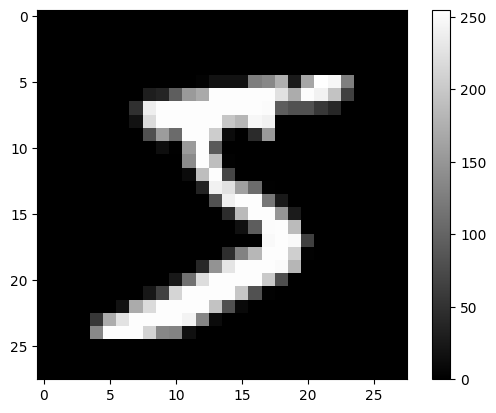

In [18]:
all_values = data_list[0].split(",")  

# Преобразование значений (начиная со второго) в массив и изменение формы на 28x28
image_array = np.asarray(all_values[1:], dtype=np.float64).reshape(28, 28)  

#image_array = 255 - image_array    #Строка если хочешь белый фон и черную картинку
# Отображение изображения
plt.imshow(image_array, cmap="gray", interpolation="none")  
plt.colorbar()  # Добавляем шкалу для визуализации интенсивности
plt.show()

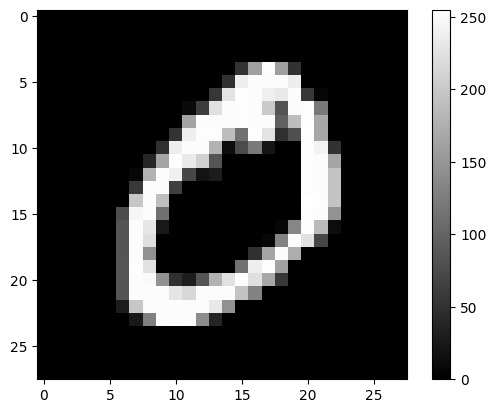

In [19]:
all_values = data_list[1].split(",")  

# Преобразование значений (начиная со второго) в массив и изменение формы на 28x28
image_array = np.asarray(all_values[1:], dtype=np.float32).reshape(28, 28)  

#image_array = 255 - image_array    #Строка если хочешь белый фон и черную картинку
# Отображение изображения
plt.imshow(image_array, cmap="gray", interpolation="none")  
plt.colorbar()  # Добавляем шкалу для визуализации интенсивности
plt.show()

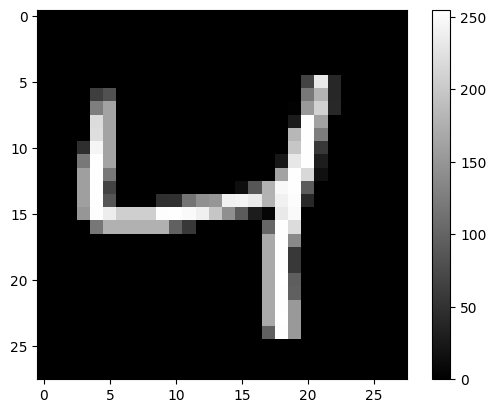

In [107]:
all_values = data_list[2].split(",")  

# Преобразование значений (начиная со второго) в массив и изменение формы на 28x28
image_array = np.asarray(all_values[1:], dtype=np.float32).reshape(28, 28)  

#image_array = 255 - image_array    #Строка если хочешь белый фон и черную картинку
# Отображение изображения
plt.imshow(image_array, cmap="gray", interpolation="none")  
plt.colorbar()  # Добавляем шкалу для визуализации интенсивности
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Цикл по индексам массива от 0 до 10
for idx in range(11):  # Индексы с 0 по 10
    all_values = data_list[idx].split(",")  # Получаем данные для текущего индекса
    
    # Преобразование значений (начиная со второго) в массив и изменение формы на 28x28
    image_array = np.asarray(all_values[1:], dtype=np.float32).reshape(28, 28)
    
    # Создаем новую фигуру для каждого графика
    plt.figure(figsize=(3, 3))
    
    # Инвертировать изображение, если нужно (закомментировано по умолчанию)
    # image_array = 255 - image_array  
    
    # Отображение изображения
    plt.imshow(image_array, cmap="gray", interpolation="none")
    plt.title(f"Index: {idx}")  # Заголовок с номером индекса
    plt.colorbar()  # Добавляем шкалу интенсивности
    plt.show()


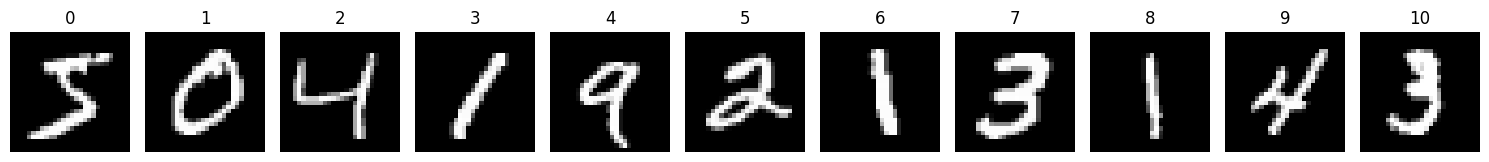

In [110]:
fig, axes = plt.subplots(1, 11, figsize=(15, 3))  # 11 графиков в строку

for idx in range(11):
    all_values = data_list[idx].split(",")
    image_array = np.asarray(all_values[1:], dtype=np.float64).reshape(28, 28)
    axes[idx].imshow(image_array, cmap="gray", interpolation="none")
    axes[idx].set_title(f"{idx}")
    axes[idx].axis("off")  # Убираем оси

plt.tight_layout()
plt.show()


1. Перевести значения цветовых кодов из большого диапазона 0 - 255 в намного меньший (0.01 - 1)
2. Делим на 255 все числа в массиве (который опичывает число как на картинке выше, любое)
3. Умножаем массив на 0.99,что приведет к диапазону 0 - 0.99 и добавляем 0.01 и получаем нужный нам диапазон значений чисел в массиве 0.01 - 1
   Напоминает операцию стандартизации в ML методах

In [20]:
scaled_input = (np.asarray(all_values[1:], dtype=np.float64) / 255.0 * 0.99) + 0.01

In [21]:
print(scaled_input)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

1. Сигналы на выходе нейронки не дадут диапазон 0 - 255, так как мы применяли логистическую ф-цию активации(сигмоиду).
2. Ее значения охватывают диапазон числе от 0.1 до 1.0 (0 и 1 - ассимптоты).  
3. Таким образом нам нужно масштабировать выходные значения в процессе тренировки. Но вообще, давайте зададимся вопросом что должны получить на выходе НС?
4. Должно ли это быть изображение ответа? В таком случае нам нужно иметь 28 на 28 = 784 узла(из каждого по сигналу)
5. Но, по сути, мы просим НС классифицировать изображение и присвоить ему соответствующий маркер (т.е. сопоставить цифру в диапазоне 0 - 9 нужной картинке)
6. Это означает что выходной слой сети должен иметь 10 узлов, по дному на каждый возможный ответ.(картинка ниже:)

<img src= "./png/Example_2.png">

1. На выходе НС невозможно получить значения 1 и 0 из-за функции активации. (привеодят к насыщению сети и большим весам) 
2. Поэтому вместо записи маркера на цифру "5" в таком виде: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
3. Мы масштабируем значение маркара:  [0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01]

In [22]:
# Создадим целевую матрицу значений. Узлов выходном слое - 10
onodes = 10 
targets = np.zeros(onodes) + 0.01
targets[int(all_values[0])] = 0.99
print(targets)

[0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


In [ ]:
print(all_values[0])

0


In [9]:

input_nodes = 784   #количество пикселей из которых состоит изображение рукописной цифры
hidden_nodes = 100  #100? не имею строгого научного обоснования 
output_nodes = 10

learning_rate = 0.3
#создаем класс нейросети
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

training_data_file = open("./mnist_dataset/mnist_train_100.csv", "r")
training_data_list = training_data_file.readlines()
training_data_file.close()

#тренировка сети

#перебрать все записи в тренировочном наборе данных
for record in training_data_list:
    all_values = record.split(",")  
    inputs = (np.asarray(all_values[1:], dtype=np.float64) / 255.0 * 0.99) + 0.01
    targets = np.zeros(output_nodes) + 0.01
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)

In [10]:
print(inputs.shape)
print(targets.shape)

(784,)
(10,)


In [12]:
test_data_file = open("./mnist_dataset/mnist_test_10.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

all_values_test = test_data_list[0].split(",")
print(all_values_test)

['7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',

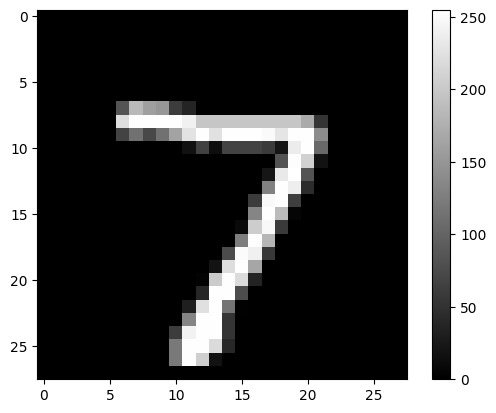

In [13]:
image_array = np.asarray(all_values_test[1:], dtype=np.float64).reshape(28, 28) 
plt.imshow(image_array, cmap="gray", interpolation="none")  
plt.colorbar()  # Добавляем шкалу для визуализации интенсивности
plt.show()

In [14]:
n.query(np.asarray(all_values_test[1:], dtype=np.float64) / 255.0 * 0.99) + 0.01

array([[0.08202195],
       [0.0231897 ],
       [0.0204457 ],
       [0.05240049],
       [0.14054716],
       [0.02738047],
       [0.01390175],
       [0.96237934],
       [0.02525394],
       [0.0445238 ]])

In [ ]:
# for record in training_data_list:
#     all_values = record
#     # Проверяем корректность данных
#     if len(all_values) == input_nodes + 1:  # 784 входов + 1 метка
#         inputs = (np.asfarray(all_values[1:], dtype=np.float64) / 255.0 * 0.99) + 0.01
#         targets = np.zeros(output_nodes) + 0.01
#         targets[int(all_values[0])] = 0.99
#         n.train(inputs, targets)
#     else:
#         print(f"Некорректная запись: {all_values}")


Некорректная запись: 5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,

In [16]:
# Цифру 7 наша сеть распознала корректно, посмотрим как она справится с остальной частью данных для тестирования

# Журнал оценок работы сети
scorecard = []

# Переберем все записи в тестовом наборе данных
for record in test_data_list:
    all_values = record.split(",")   
    correct_label = int(all_values[0])  # Правильный ответ - первое значение
    print("Маркерное значение(истинное значние): ", correct_label)
    inputs = (np.asarray(all_values[1:], dtype=np.float64) / 255.0 * 0.99) + 0.01 #масштабируем и смещаем входные значения
    outputs = n.query(inputs)
    label = np.argmax(outputs) #индекс наибольшего значения является маркерным значением   
    print(label, " ответ сети")    
    # Присоединить оценку ответа сети к концу списка
    if (label == correct_label):
        # Если сеть правильно определила значение, присоединить к списку 1
        scorecard.append(1)
    else:
        scorecard.append(0)

print(scorecard)

Маркерное значение(истинное значние):  7
7  ответ сети
Маркерное значение(истинное значние):  2
6  ответ сети
Маркерное значение(истинное значние):  1
1  ответ сети
Маркерное значение(истинное значние):  0
0  ответ сети
Маркерное значение(истинное значние):  4
4  ответ сети
Маркерное значение(истинное значние):  1
1  ответ сети
Маркерное значение(истинное значние):  4
4  ответ сети
Маркерное значение(истинное значние):  9
3  ответ сети
Маркерное значение(истинное значние):  5
4  ответ сети
Маркерное значение(истинное значние):  9
4  ответ сети
[1, 0, 1, 1, 1, 1, 1, 0, 0, 0]


In [ ]:
# Не самый хороший результат, так как из 10 тестовых значений правильно распознаных - 6
# Выведем долю правильно распознаных ответов
scorecard_array = np.asarray(scorecard)
print("Эффективность НС = ", scorecard_array.sum() / scorecard_array.size) 

Эффективность НС =  0.6
